In [1]:
%load_ext autoreload 
%autoreload 2 

/bin/bash: git: command not found


# Validation and plotting of LSTM_03 trained on downsampled data

In [2]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

2023-06-14 15:07:53.754131: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-14 15:07:53.803223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 15:07:54.460102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Load Model

In [3]:
lstm_03_path = '/projects/p31961/dopamine_modeling/results/models/LSTM_03_simple_downsampled'
lstm_03 = tf.keras.models.load_model(lstm_03_path)

2023-06-14 15:08:00.146968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38222 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:06:00.0, compute capability: 8.0
2023-06-14 15:08:00.148726: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38222 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:2f:00.0, compute capability: 8.0
/home/mds8301/.conda/envs/dope/lib/python3.11/site-packages/keras/layers/core/lambda_layer.py:325: UserWarning: src.modeling.prototyping.lstm_protype_simple is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(
2023-06-14 15:08:00.600898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGU

#### load training and testing data

In [4]:
dataset_dir = '/projects/p31961/gaby_data/aggregated_data/data_pipeline_downsampled/datasets'
X_train_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_X_train.parquet.gzip')
X_test_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_X_test.parquet.gzip')
y_train_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_y_train.parquet.gzip')
y_test_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_y_test.parquet.gzip')

X_train = pd.read_parquet(X_train_path)
X_test = pd.read_parquet(X_test_path)
y_train = pd.read_parquet(y_train_path)
y_test = pd.read_parquet(y_test_path)

In [5]:
prediction = lstm_03.predict(X_test)

2023-06-14 15:08:28.655934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-14 15:08:28.657268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-14 15:08:28.658397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

   42/49576 [..............................] - ETA: 1:01    

2023-06-14 15:08:29.637274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/mds8301/.conda/envs/dope/lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget


49576/49576 [==============================] - 61s 1ms/step


In [7]:
full_dataset = X_test.assign(predicted_signal = prediction,
                             true_signal = y_test['signal'])
full_dataset


,day,time,trial,event_cue,event_shock,sensor_D1,sensor_D2,sensor_DA,predicted_signal,true_signal
0,6,-25.000000,0,0,0,1,0,0,0.168234,-0.047544
1,6,-24.901531,0,0,0,1,0,0,0.167285,0.115965
2,6,-24.803064,0,0,0,1,0,0,0.166279,-0.046369
3,6,-24.704596,0,0,0,1,0,0,0.165214,-0.030047
4,6,-24.606127,0,0,0,1,0,0,0.164089,0.461070
...,...,...,...,...,...,...,...,...,...,...
1827,7,19.606127,3,0,0,0,1,0,-0.238097,-0.644031
1828,7,19.704596,3,0,0,0,1,0,-0.238642,-0.422976
1829,7,19.803064,3,0,0,0,1,0,-0.239182,-0.215876
1830,7,19.901531,3,0,0,0,1,0,-0.239717,-0.207441


In [8]:
test_query = "day==6 & event_cue== 1 & sensor_DA==1 "
day_6_cue_DA_query_result = full_dataset.query(test_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])
day_6_cue_DA_query_result

,day,time,trial,event_cue,sensor_DA,predicted_signal,true_signal
0,6,-25.000000,0,1,1,0.083218,1.271612
1,6,-24.901531,0,1,1,0.081441,0.354583
2,6,-24.803064,0,1,1,0.079631,-0.016330
3,6,-24.704596,0,1,1,0.077788,0.150160
4,6,-24.606127,0,1,1,0.075910,0.077775
...,...,...,...,...,...,...,...
12819,6,19.606127,27,1,1,-0.143551,-0.754537
12820,6,19.704596,27,1,1,-0.143769,-0.038715
12821,6,19.803064,27,1,1,-0.143980,-0.349837
12822,6,19.901531,27,1,1,-0.144186,-0.556358


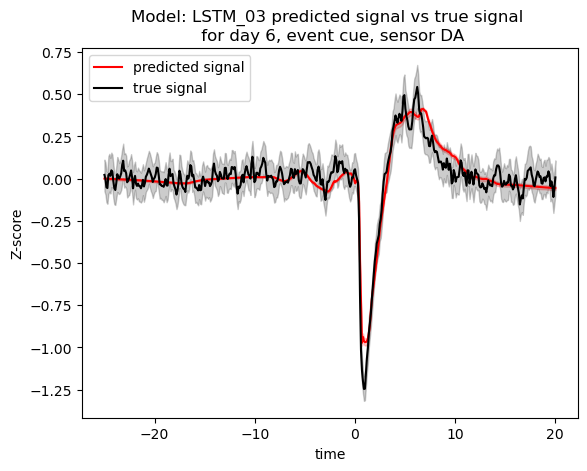

In [9]:
def plot_data(data, day, event, sensor):
    sns.lineplot(data = data, x = 'time', y = 'predicted_signal', color = 'red', label = 'predicted signal')
    sns.lineplot(data = data, x = 'time', y = 'true_signal', color = 'black', label = 'true signal')
    plt.title(f'Model: LSTM_03 predicted signal vs true signal \n for day {day}, event {event}, sensor {sensor}')
    plt.ylabel('Z-score')
    
plot_data(day_6_cue_DA_query_result, 6, 'cue', 'DA')

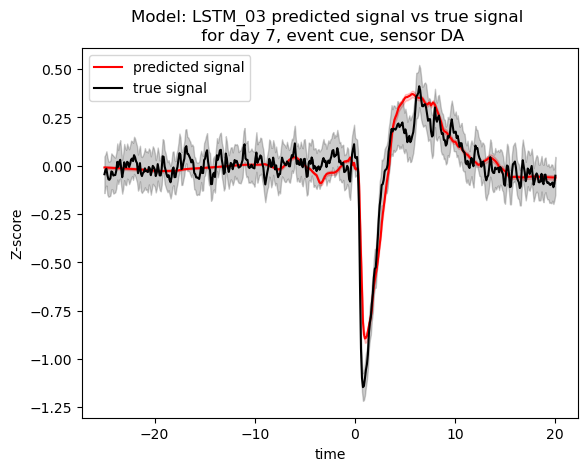

In [10]:
day_7_da_query = "day==7 & event_cue== 1 & sensor_DA==1 "
day_7_cue_DA_query_result = full_dataset.query(day_7_da_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])
plot_data(day_7_cue_DA_query_result, 7, 'cue', 'DA')

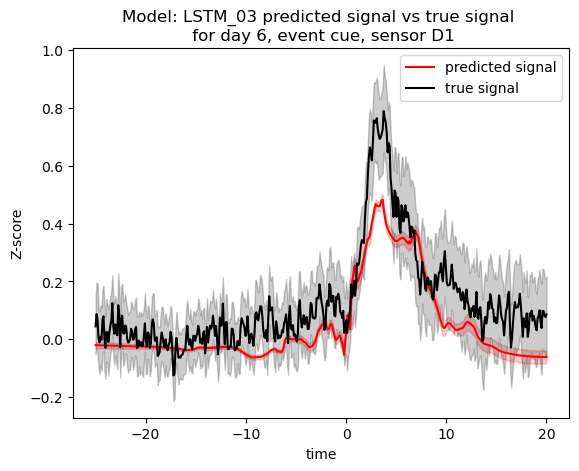

In [11]:
day_6_d1_query = "day==6 & event_cue== 1 & sensor_D1==1 "
day_6_d1_query_result = full_dataset.query(day_6_d1_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])

plot_data(day_6_d1_query_result, 6, 'cue', 'D1')

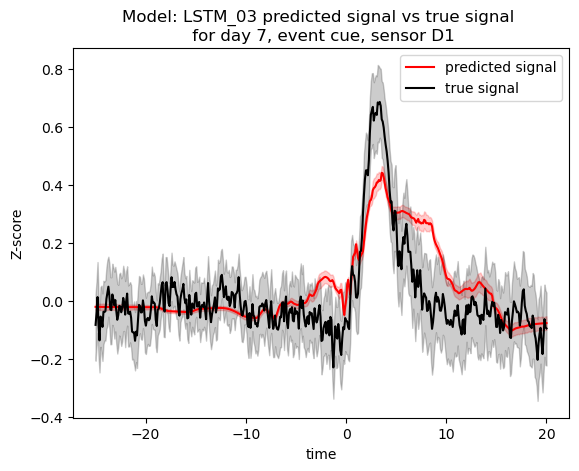

In [12]:
day_7_d1_query = "day==7 & event_cue== 1 & sensor_D1==1 "
day_7_d1_query_result = full_dataset.query(day_7_d1_query)

plot_data(day_7_d1_query_result, 7, 'cue', 'D1')

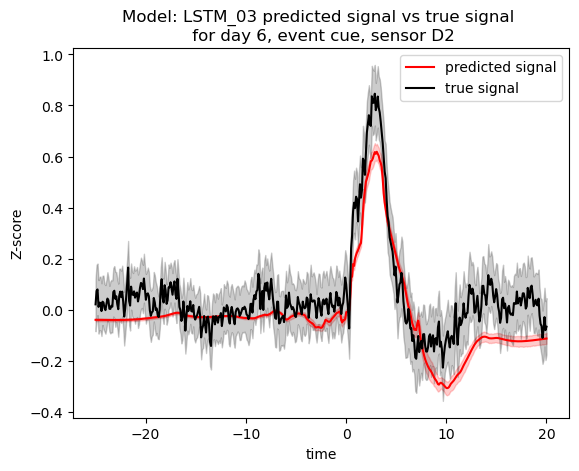

In [13]:
day_6_d2_query = "day==6 & event_cue== 1 & sensor_D2==1 "
day_6_d2_query_result = full_dataset.query(day_6_d2_query)

plot_data(day_6_d2_query_result, 6, 'cue', 'D2')

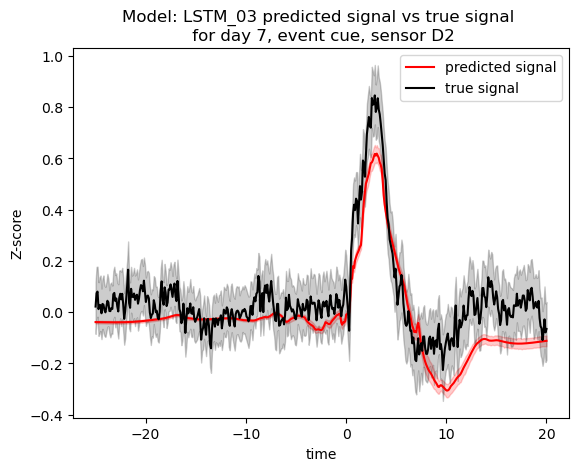

In [14]:
day_7_d2_query = "day==7 & event_cue== 1 & sensor_D2==1 "
day_7_d2_query_result = full_dataset.query(day_6_d2_query)

plot_data(day_7_d2_query_result, 7, 'cue', 'D2')